# Solving 2-citizen, 2-elite situation

I think this will give some insight into what is possible in this problem. 

There are two citizen agents, two elite agents, and each agent has a 1D opinion. I have a feeling that initial opinions outside 1 will diverge; this is something that should be shown eventually. I want to write the update equations directly, and then I can work on generalizing, since I keep confusing myself about what's going on.

In [37]:
import numpy as np

c1, c2 = (-0.1, 0.5)
e1, e2 = (-0.4, 0.3)

def sigmoid(c, e):
    return 1.0 / (1.0 + np.exp(-1.0 * (c * e)))

# UNCOMMENT TO PLOT 2D SIGMOID
# import matplotlib.pyplot as plt
# z = np.linspace(-1, 1, 2000)
# x, y = np.meshgrid(z, z, sparse=False, indexing='xy')

# sig = sigmoid(x, y)

# plt.imshow(sig, cmap=plt.cm.gray_r)
# plt.colorbar()

# plt.gca().set_xticks(list(range(10)))
# plt.gca().set_yticks(list(range(10)))
# plt.gca().set_xticklabels(('-1', '1'))
# plt.gca().set_yticklabels(('-1', '1'))

In [100]:
'''
Set up functions for running the iterations.
'''
def cossim(v1, v2):
    return (v1 * v2) / (np.abs(v1) * np.abs(v2))
    #     return v1.dot(v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

def softmax_vote(v1, other1, other2):
    # Logistic activation function.
    g1 = sigmoid(v1, other1)
    g2 = sigmoid(v1, other2)
    norm = 1.0 / (np.exp(g1) + np.exp(g2))
    return norm * np.array([np.exp(g1), np.exp(g2)])

def get_elite_payoff(c1, c2, e1, e2):
    # Calculate votes from c1 and c2.
    c1_votes = softmax_vote(c1, e1, e2)
    c2_votes = softmax_vote(c2, e1, e2)
    
    e1_payoff = c1_votes[0] + c2_votes[0]
    e2_payoff = c1_votes[1] + c2_votes[1]
    
    return e1_payoff, e2_payoff

def get_citizen_payoff(c1, c2, e1, e2):
    c1_payoff = 0.5 * (cossim(c1, e1) + cossim(c1, e2))
    c2_payoff = 0.5 * (cossim(c2, e1) + cossim(c2, e2))
    
    return c1_payoff, c2_payoff

def get_update(v1, v2, species, other1, other2):
    'Compute update of values'
    
    if species == 'elite':
        payoffs = get_elite_payoff(v1, v2, other1, other2)
        print('Elite: ', payoffs)
    elif species == 'citizen':
        payoffs = get_citizen_payoff(v1, v2, other1, other2)
        print('Citizen: ', payoffs)
    else:
        raise Exception('Species must be "elite" or "citizen"')
    
    dpayoff = np.abs(payoffs[1] - payoffs[0])
    
    ret = cossim(v1, v2) * dpayoff
    
    return ret

Citizen:  (0.0, 0.0)
Citizen:  (0.0, 0.0)
Elite:  (1.009360974696641, 0.99063902530335901)
Elite:  (1.009360974696641, 0.99063902530335901)
Citizen:  (0.0, 0.0)
Citizen:  (0.0, 0.0)
Elite:  (1.0105289000017383, 0.98947109999826166)
Elite:  (1.0105289000017383, 0.98947109999826166)
Citizen:  (0.0, 0.0)
Citizen:  (0.0, 0.0)
Elite:  (1.0118423533083916, 0.98815764669160844)
Elite:  (1.0118423533083916, 0.98815764669160844)
Citizen:  (0.0, 0.0)
Citizen:  (0.0, 0.0)
Elite:  (1.0133193882338967, 0.98668061176610333)
Elite:  (1.0133193882338967, 0.98668061176610333)
Citizen:  (0.0, 0.0)
Citizen:  (0.0, 0.0)
Elite:  (1.0149802643526544, 0.98501973564734568)
Elite:  (1.0149802643526544, 0.98501973564734568)
Citizen:  (1.0, -1.0)
Citizen:  (-1.0, 1.0)
Elite:  (1.0168477024709404, 0.98315229752905942)
Elite:  (1.0168477024709404, 0.98315229752905942)
Citizen:  (0.0, 0.0)
Citizen:  (0.0, 0.0)
Elite:  (1.0118005143001794, 0.98819948569982052)
Elite:  (1.0118005143001794, 0.98819948569982052)
Citize

/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


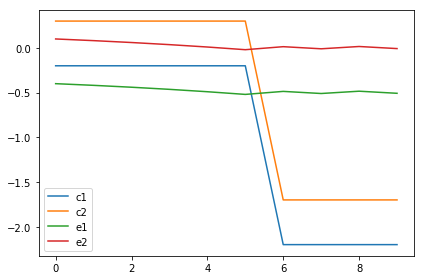

In [101]:
n_steps = 10
c1_t = np.zeros(n_steps)
c2_t = np.zeros(n_steps)
e1_t = np.zeros(n_steps)
e2_t = np.zeros(n_steps)

c1_t[0] = -.2; c2_t[0] = .3
e1_t[0] = -.4; e2_t[0] = .1

for ii in range(1, n_steps):
    c1_t[ii] = c1_t[ii-1] + get_update(c1_t[ii-1], c2_t[ii-1], 
                                       'citizen', e1_t[ii-1], e2_t[ii-1])
    c2_t[ii] = c2_t[ii-1] + get_update(c2_t[ii-1], c1_t[ii-1], 'citizen',
                                       e1_t[ii-1], e2_t[ii-1])
    e1_t[ii] = e1_t[ii-1] + get_update(e1_t[ii-1], e2_t[ii-1], 'elite',
                                       c1_t[ii-1], c2_t[ii-1])
    e2_t[ii] = e2_t[ii-1] + get_update(e2_t[ii-1], e1_t[ii-1], 'elite',
                                       c1_t[ii-1], c2_t[ii-1])
    
plt.plot(c1_t, label='c1')
plt.plot(c2_t, label='c2')
plt.plot(e1_t, label='e1')
plt.plot(e2_t, label='e2')
plt.legend()